In [1]:
#sudo apt-get install python3-pandas
import pandas as pd
import numpy as np
import re
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

def split_wav(data, sample_rate, start, end):
    start *= sample_rate
    end *= sample_rate
    return data[start:end]

import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
path = '/home/ubuntu/DA'

file_list = os.listdir(path)
file_list

os.chdir('/home/ubuntu/DA/dataframe')

pop_file_list = os.listdir(path+ '/' + 'pop')

print(pd.DataFrame(pop_file_list))

hip_file_list = os.listdir(path+ '/' + 'hip-hop')

print(pd.DataFrame(hip_file_list))

                                                   0
0  Maroon 5 - Sugar (Official Music Video)-09R8_2...
1   Carly Rae Jepsen - Call Me Maybe-fWNaR-rxAic.mp3
2  Sia - Chandelier (Official Video)-2vjPBrBU-TM.mp3
3  Mark Ronson - Uptown Funk (Official Video) ft....
4  Ed Sheeran - Shape of You (Official Music Vide...
5  Wiz Khalifa - See You Again ft. Charlie Puth [...
6                          The Wanted - Glad You.mp3
7  Cheryl Cole - Fight For This Love (Official Vi...
                                                    0
0   SUPERBEE(수퍼비) - 수퍼비와 (Feat. BewhY) (Prod. Bewh...
1   창모 (CHANGMO), 해쉬스완 (Hash Swan), 애쉬 아일랜드 (ASH I...
2   프라이머리 - 독 (Feat. E Sens of 슈프림팀) 가사-QuC_EqHjA7...
3   기리보이, Kid Milli, NOEL, 스윙스 - flex (Prod.By 기리보...
4   슈퍼비 (SUPERBEE) - +82 Bars [Rap Legend]-1-sg3fu...
5   Jvcki Wai, 영비, Osshun Gum, 한요한 - 띵 (Prod.By 기리...
6                           창모 (CHANGMO) - METEOR.mp3
7                염따 - 돈 Call Me (Prod. by BRLLNT).mp3
8        HAON - 붕붕(Feat. Sik-K)(Prod.

In [3]:
y, sr = librosa.load('/home/ubuntu/DA/pop/'+ pop_file_list[3])
y = split_wav(y, sr, 0, 90)
p_harm, p_perc = librosa.effects.hpss(y)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hip_file_list[7])
y = split_wav(y, sr, 0, 90)
h_harm, h_perc = librosa.effects.hpss(y)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(1,1,'Uptown Funk')

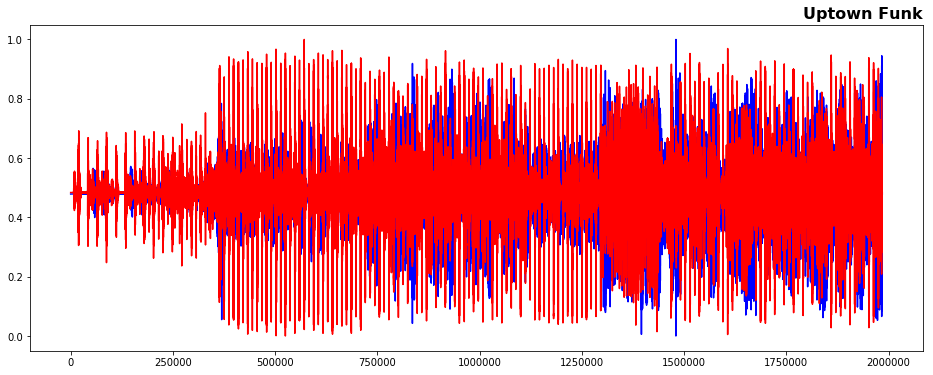

In [4]:
plt.figure(figsize = (16,6))
plt.plot(normalize(p_harm), color = 'b')
plt.plot(normalize(p_perc), color = 'r')

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Uptown Funk', fontdict=title_font, loc='right')

Text(1,1,'돈 call me')

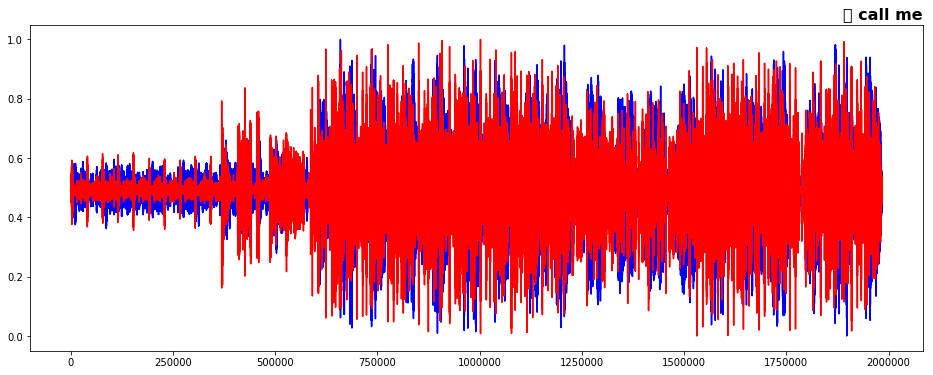

In [4]:
fig = plt.figure(figsize = (16,6))
plt.plot(normalize(h_harm), color = 'b')
plt.plot(normalize(h_perc), color = 'r')

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('돈 call me', fontdict=title_font, loc='right')


/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


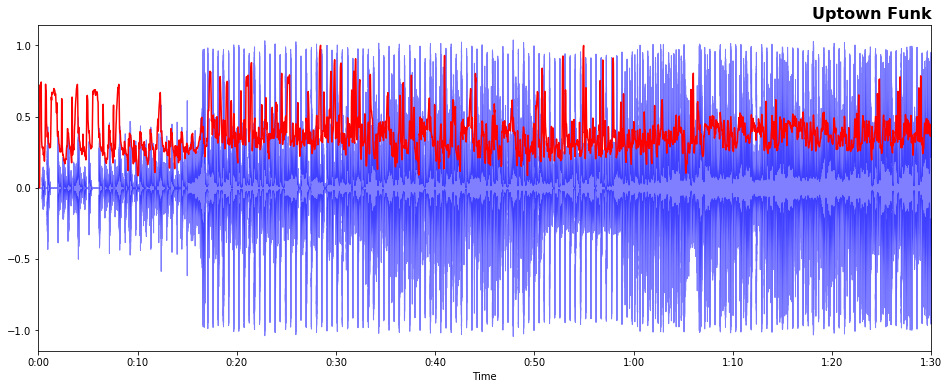

In [11]:
#2D 음파 및 무게 중심 그래프

y, sr = librosa.load('/home/ubuntu/DA/pop/'+ pop_file_list[3])
y = split_wav(y, sr, 0, 90)
sc = librosa.feature.spectral_centroid(y, sr)[0]
frames = range(len(sc))
t = librosa.frames_to_time(frames)

plt.figure(figsize = (16,6))
librosa.display.waveplot(y, sr, alpha = 0.5, color = 'b')
plt.plot(t, normalize(sc), color = 'r')
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Uptown Funk', fontdict=title_font, loc='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


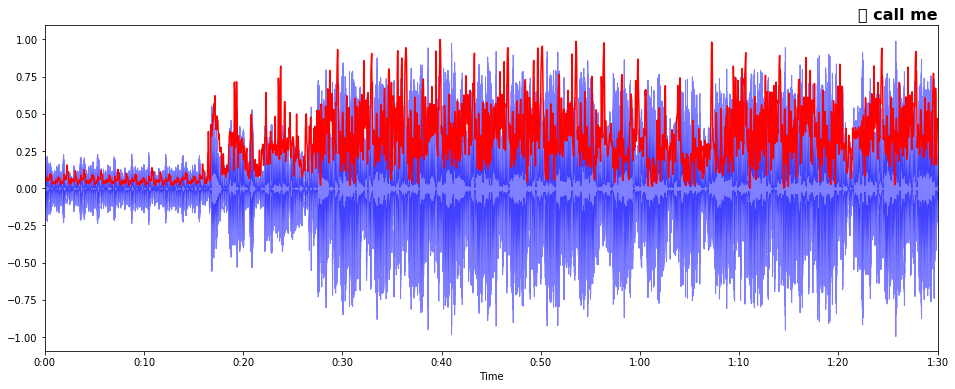

In [13]:
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)



y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hip_file_list[7])
y = split_wav(y, sr, 0, 90)
sc = librosa.feature.spectral_centroid(y, sr)[0]
frames = range(len(sc))
t = librosa.frames_to_time(frames)

plt.figure(figsize = (16,6))
librosa.display.waveplot(y, sr, alpha = 0.5, color = 'b')
plt.plot(t, normalize(sc), color = 'r')
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('돈 call me', fontdict=title_font, loc='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


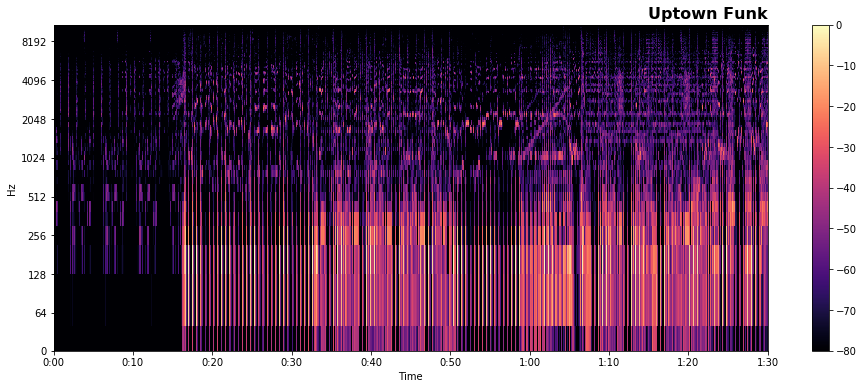

In [3]:
y, sr = librosa.load('/home/ubuntu/DA/pop/'+ pop_file_list[3])
y = split_wav(y, sr, 0, 90)

s = librosa.feature.melspectrogram(y, sr)
s_db = librosa.amplitude_to_db(s, ref = np.max)

plt.figure(figsize = (16,6))
librosa.display.specshow(s_db, sr = sr,  x_axis = 'time', y_axis = 'log')
plt.colorbar()
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Uptown Funk', fontdict=title_font, loc='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


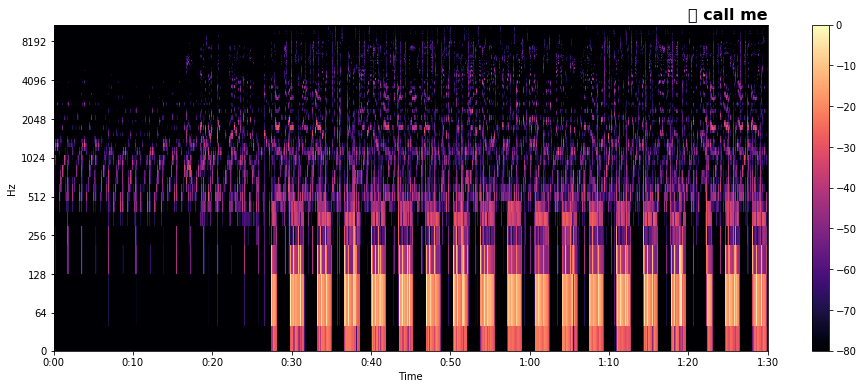

In [4]:
y, sr = librosa.load('/home/ubuntu/DA/hip-hop/'+ hip_file_list[7])
y = split_wav(y, sr, 0, 90)

s = librosa.feature.melspectrogram(y, sr)
s_db = librosa.amplitude_to_db(s, ref = np.max)

plt.figure(figsize = (16,6))
librosa.display.specshow(s_db, sr = sr, hop_length = 512, x_axis = 'time', y_axis = 'log')
plt.colorbar()
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('돈 call me', fontdict=title_font, loc='right')
plt.show()

In [12]:
#plt.savefig()